# 1. 공공 데이터 상권 정보 분석해보기

### 설정 및 데이터 불러오기

In [44]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
# !pip3 install seaborn
import seaborn as sns

# 시각화를 위한 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False) # 폰트 깨짐 방지

# 그래프가 노트북 안에 보이도록 설정
%matplotlib inline

# 폰트 선명하게 보이도록 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 데이터 로드하기
df = pd.read_csv('./data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', low_memory=False, encoding='cp949')
df.shape # 행, 열 수 확인



/var/folders/vg/j7x3sgrn3gd9cyqcm37zp9kw0000gn/T/ipykernel_98557/3587108488.py:17: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


(91335, 39)

### 데이터 확인하기

In [45]:
# 데이터 미리보기
# shift + tab 키로 docstring 볼 수 있음
df.head(2) # 위에서 n개 보여줌 ( 5개가 기본 )
df.tail(1) # 아래에서 n개 ( 5개가 기본 )

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4.410000e+24,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.80664


In [46]:
# 데이터 요약하기
# info로 데이터의 개요 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  float64
 20  대지구분코드

In [47]:
# 컬럼명 보기
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [48]:
# 데이터 타입 확인
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드         float64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호       float64
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보          float64
호정보          float64
경도           float64
위도           float64
dtype: object

### 데이터 전처리

# 미션 1. 전국 시도별 약국수를 구해주세요!

상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 

이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 

각자 구하기 편한 방법을 통해 빈도수를 구합니다.

In [49]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

,컬럼명,결측치 수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


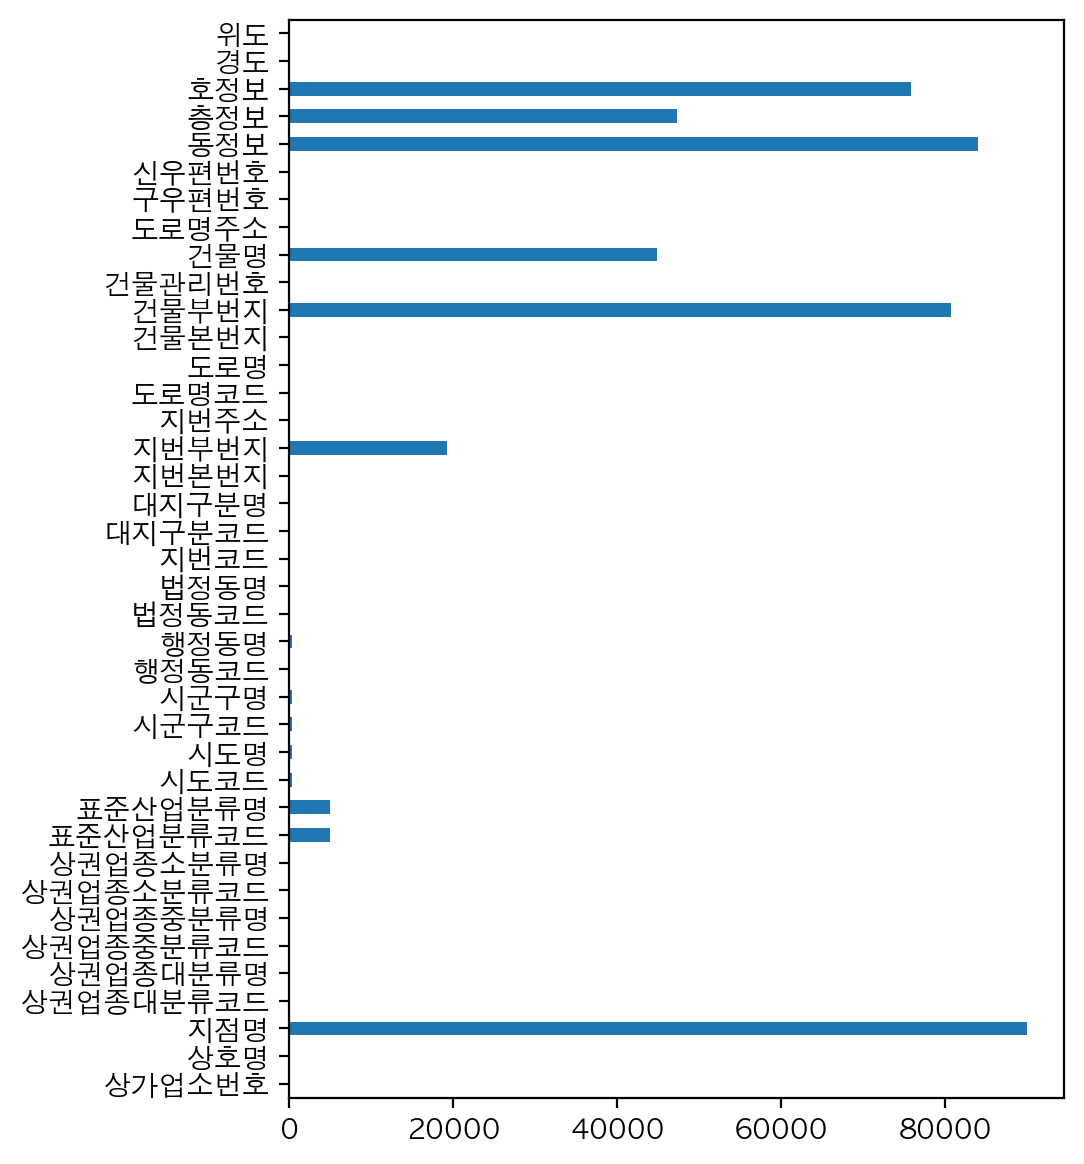

In [50]:
# 결측치 개수 확인
null_count = df.isnull().sum()
null_count.plot.barh(figsize=(5,7)) # bar()과 x,y축 반전됨

# 결측치 정보 데이터프레임으로 바꾸기
df_null_count = null_count.reset_index()
df_null_count.columns = ["컬럼명", "결측치 수"] # 컬럼 명 변경

# 결측치가 많은 순으로 상위 10개 출력
df_null_count = df_null_count.sort_values(by="결측치 수", ascending=False)
df_null_count.head(10)

In [51]:
# 특정 컬럼만 불러오기
# NaN == Not a Number의 약자로 결측치 의미
df["지점명"].head()

# 결측치가 많은 10개의 컬럼명을 list에 담아둠
drop_columns = df_null_count.head(10)["컬럼명"].tolist()
df[drop_columns].head()

# 결측치 제거하기
print(df.shape)
df = df.drop(drop_columns, axis=1) # 행을 기준으로 drop하기 위해 axis=1
print(df.shape)
df.info()

(91335, 39)
(91335, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도명        90956 non-null  object 
 9   시군구코드      90956 non-null  float64
 10  시군구명       90956 non-null  object 
 11  행정동코드      91335 non-null  int64  
 12  행정동명       90956 non-null  object 
 13  법정동코드      91280 non-null  float64
 14  법정동명       91280 non-null  object 
 15  지번코드       91335 non-null  int64  
 16  대지구분코드     91335 non-null  int64  
 17  대지구분명      91335 non-null  object 
 18  지번본번지      91335 non-null  int64  
 19  지번주소       91335 non-n

### 데이터 이해하기

In [56]:
# 기초 통계 수치 확인하기
# 평균값 mean
print("평균값", df["위도"].mean())
# 중앙값 median
print("중앙값", df["위도"].median())
# 최댓값
print("최댓값", df["위도"].max())
# 최솟값
print("최솟값", df["위도"].min())
# 개수
print("개수", df["위도"].count())

평균값 36.62471119236685
중앙값 37.2346523177033
최댓값 38.4996585705598
최솟값 33.2192896688307
개수 91335


In [62]:
# 기초 통계값 요약하기 - descibe -> 결측치는 제외됨
df["위도"].describe() # 50% = median
print(df[["위도", "경도"]].describe()) # 2개 컬럼 이상 -> dataframe 형태로 출력됨

# 문자열 데이터 타입의 요약
df.describe(include='object') # top: 가장 많은, freq: top의 빈도수

                 위도            경도
count  91335.000000  91335.000000
mean      36.624711    127.487524
std        1.041361      0.842877
min       33.219290    124.717632
25%       35.811830    126.914297
50%       37.234652    127.084550
75%       37.507463    128.108919
max       38.499659    130.909912


,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,도로명주소
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,90956,91280,91335,91335,91335,91335,91335
unique,56910,1,1,5,5,34,34,17,228,2791,2822,2,53118,16610,54142,54031
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중앙동,중동,대지,서울특별시 동대문구 제기동 965-1,서울특별시 강남구 강남대로,1123010300109650001031604,서울특별시 동대문구 약령중앙로8길 10
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,1856,874,91213,198,326,198,198


In [ ]:
# 중복 제거한 값 보기
